In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv("asteroid.csv", low_memory=False)
df.head()

,Asteroid Number,Asteroid,N-sig,Ref.,YYYY-mmm-DD,MMD(AU),Vrel(km/s)
0,NaN,1999 TO13,280,JPL#13,10-05-1999,0.0312,14.96
1,NaN,1999 SG10,690,JPL#22,10/14/1999,0.0909,19.77
2,NaN,1999 UR,320,JPL#02,10/22/1999,0.0470,10.01
3,NaN,1999 VF22,300,JPL#02,10/31/1999,0.0372,25.54
4,NaN,1999 VR6,110,JPL#04,11/18/1999,0.0759,21.58


In [98]:
##EDA

In [99]:
df.rename(columns = {'YYYY-mmm-DD':'Approach Date'}, inplace = True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Asteroid Number  280 non-null    float64
 1   Asteroid         498 non-null    object 
 2   N-sig            498 non-null    int64  
 3   Ref.             498 non-null    object 
 4   Approach Date    498 non-null    object 
 5   MMD(AU)          498 non-null    float64
 6   Vrel(km/s)       498 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 27.4+ KB


In [101]:
# df.isnull().sum()
df.isnull().sum() / len(df) * 100

Asteroid Number    43.7751
Asteroid            0.0000
N-sig               0.0000
Ref.                0.0000
Approach Date       0.0000
MMD(AU)             0.0000
Vrel(km/s)          0.0000
dtype: float64

In [102]:
#since asteroid number is absent for almost half of the entries, we can drop it as we already hvae asteroid id for mapping. 
df = df.drop(['Asteroid Number'], axis=1)

In [103]:
df

,Asteroid,N-sig,Ref.,Approach Date,MMD(AU),Vrel(km/s)
0,1999 TO13,280,JPL#13,10-05-1999,0.0312,14.96
1,1999 SG10,690,JPL#22,10/14/1999,0.0909,19.77
2,1999 UR,320,JPL#02,10/22/1999,0.0470,10.01
3,1999 VF22,300,JPL#02,10/31/1999,0.0372,25.54
4,1999 VR6,110,JPL#04,11/18/1999,0.0759,21.58
...,...,...,...,...,...,...
493,Ptah,100000,JPL#08,03-04-2099,0.1219,9.63
494,Orpheus,180000,JPL#04,4/26/2099,0.1207,12.18
495,1997 BR,770000,JPL#05,6/25/2099,0.1912,10.24
496,Asclepius,59000,JPL#04,8/23/2099,0.0453,10.28


In [104]:
df['Asteroid'].unique()

array(['1999 TO13          ', '1999 SG10          ',
       '1999 UR            ', '1999 VF22          ',
       '1999 VR6           ', '1999 KW4           ',
       '1999 MN            ', '1999 JV6           ',
       '1986 JK            ', '1998 BB10          ',
       'Mithra             ', 'Hathor             ',
       'Toutatis           ', '1994 XL1           ',
       '1998 FG2           ', 'Cuno               ',
       '1998 VD35          ', '1994 WR12          ',
       '1998 WT            ', '1998 SF36          ',
       '1986 PA            ', '1998 HD14          ',
       '1998 ST27          ', '1998 WT24          ',
       'Khufu              ', 'Nereus             ',
       'Orpheus            ', '1999 JT6           ',
       '1999 GU3           ', '1992 FE            ',
       'Adonis             ', '1997 XF11          ',
       '1999 DB7           ', 'Golevka            ',
       '1998 FH12          ', '1994 PM            ',
       '1978 CA            ', '1998 VS        

<AxesSubplot:>

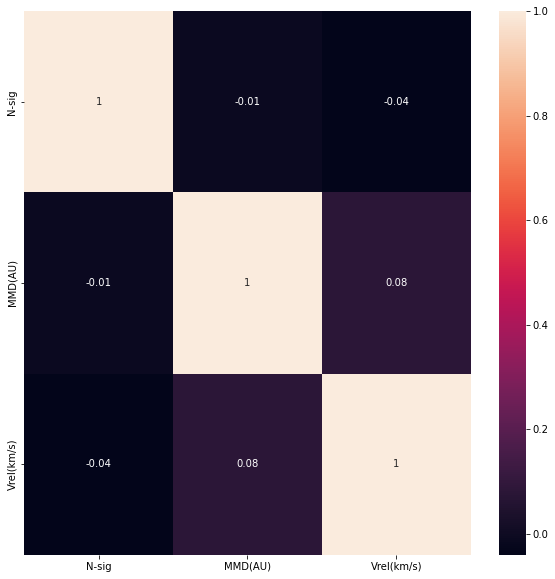

In [105]:
plt.figure(figsize=(10,10))
sns.heatmap(data=round(df.corr(),2), annot=True)